In [1]:
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
import statsmodels.api as sm 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()
bos = pd.DataFrame(boston.data, columns = boston.feature_names)

In [43]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [3]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [4]:
bos.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
bos['PRICE'] = boston.target

In [6]:
bos.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
bos.shape

(506, 14)

In [8]:
bos.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [9]:
corr = bos.corr()
corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<AxesSubplot:>

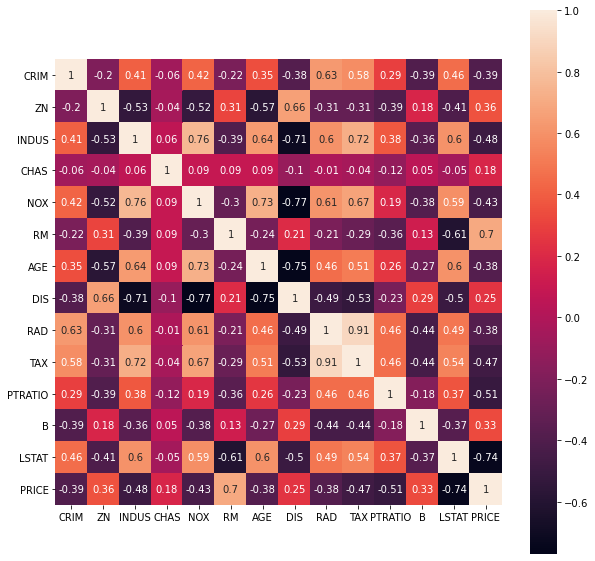

In [54]:
plt.figure(figsize=(10,10))
sns.heatmap(data=corr.round(2),annot=True,square=True)

In [ ]:
# From the above plot, RM and LSTAT seem to have highest positive and negative correlation respectively with repsect to PRICE
# We also see high correlation between independent variables RAD and TAX

In [10]:
X = bos.drop(columns = ['PRICE'])
Y = bos['PRICE']

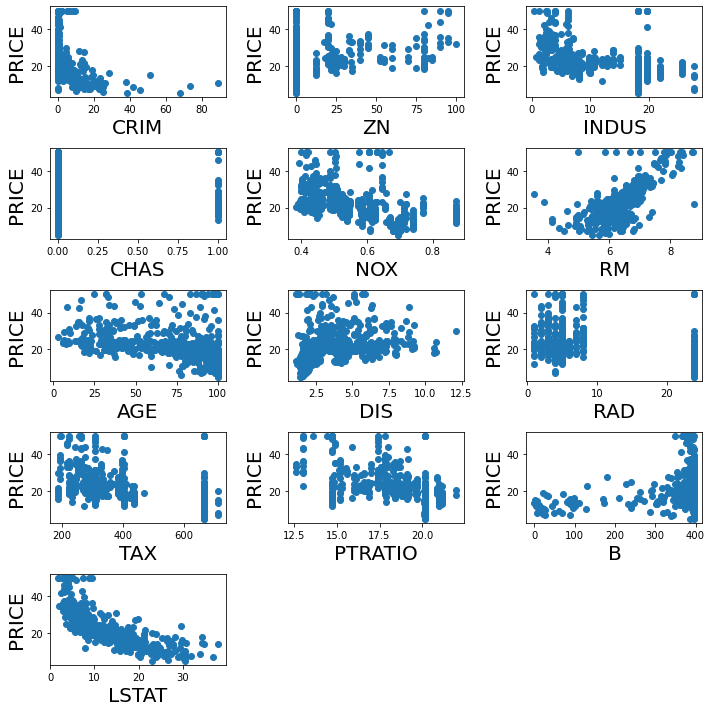

In [11]:
# observe the relationship between independent variables and dependent variable

plt.figure(figsize=(10,10), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=15 :
        ax = plt.subplot(5,3,plotnumber)
        plt.scatter(X[column],Y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('PRICE',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [12]:
# check for multicollinearity
scaler =StandardScaler()

X_scaled = scaler.fit_transform(X)

In [13]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = X_scaled
# we create a new data frame which will include all the VIFs
# note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)
# we do not include categorical values for mulitcollinearity as they do not provide much information as numerical ones do
vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = X.columns

In [14]:
vif

,VIF,Features
0,1.792192,CRIM
1,2.298758,ZN
2,3.991596,INDUS
3,1.073995,CHAS
4,4.393720,NOX
5,1.933744,RM
6,3.100826,AGE
7,3.955945,DIS
8,7.484496,RAD
9,9.008554,TAX


In [15]:
# listing vif that are lesser than 5 (greater than 5 means very severe multicollinearity)
vif[vif["VIF"]<=5].reset_index()

,index,VIF,Features
0,0,1.792192,CRIM
1,1,2.298758,ZN
2,2,3.991596,INDUS
3,3,1.073995,CHAS
4,4,4.393720,NOX
5,5,1.933744,RM
6,6,3.100826,AGE
7,7,3.955945,DIS
8,10,1.799084,PTRATIO
9,11,1.348521,B


In [17]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X_scaled,Y,test_size = 0.25,random_state=355)

In [18]:
y_train

227    31.6
382    11.3
23     14.5
348    24.5
157    41.3
       ... 
291    37.3
501    22.4
346    17.2
130    19.2
254    21.9
Name: PRICE, Length: 379, dtype: float64

In [20]:
#training our model 
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

regression.fit(x_train,y_train)

LinearRegression()

In [25]:
print("regression score: ",regression.score(x_train,y_train))

regression score:  0.7306475313474942


In [27]:
print("r2 score: ",adj_r2(x_train,y_train))

r2 score:  0.7210541557516514


In [ ]:
#  r2 score is 73.06% and adj r2 is 72.10% for our training data

In [28]:
def adj_r2(x,y):
    r2 = regression.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2


In [31]:
# Will see how well model fits the test data
regression.score(x_test,y_test)

0.7519030329262334

In [32]:
print("adjusted r2 score: ",adj_r2(x_test,y_test))

adjusted r2 score:  0.7233609039708444


In [ ]:
# So it looks like our model r2 score (72.33%) is less on the test data(75.19%).

In [34]:
#if our model is overfitting our training data.
#Lasso Regularization
# LassoCV will return best alpha and coefficients after performing 10 cross validations

from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LinearRegression
lasscv = LassoCV(alphas = None,cv =10, max_iter = 100000, normalize = True)
lasscv.fit(x_train, y_train)

LassoCV(cv=10, max_iter=100000, normalize=True)

In [35]:
# best alpha parameter
alpha = lasscv.alpha_
alpha

0.00033837642965584014

In [36]:
#now that we have best parameter, let's use Lasso regression and see how well our data has fitted before

lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.00033837642965584014)

In [37]:
lasso_reg.score(x_test, y_test)

0.7518957038694828

In [ ]:
# r2_score for test data (75.18%) comes same as before using regularization. So, it is fair to say our OLS model did not overfit the data.

In [38]:
# Using Ridge regression model
# RidgeCV will return best alpha and coefficients after performing 10 cross validations. 
# We will pass an array of random numbers for ridgeCV to select best alpha from them

alphas = np.random.uniform(low=0, high=10, size=(50,))
ridgecv = RidgeCV(alphas = alphas,cv=10,normalize = True)
ridgecv.fit(x_train, y_train)

RidgeCV(alphas=array([4.05565295, 6.51583331, 1.91705044, 1.18468152, 2.5484799 ,
       6.7573248 , 3.87674386, 3.93149536, 8.77234297, 1.2850444 ,
       5.73753894, 6.08750687, 5.64392814, 5.30891478, 5.29202135,
       1.92047237, 6.32239541, 4.21984923, 9.27255255, 5.74563603,
       2.12102374, 9.66753387, 1.36976719, 2.67098437, 9.97253297,
       9.54157749, 7.10035771, 5.92477025, 0.09440254, 9.73926781,
       5.31168721, 7.58699073, 8.62013215, 3.16065593, 7.37708122,
       2.48021649, 2.33696476, 4.07698683, 2.62646166, 7.66261517,
       4.26208915, 9.28859887, 0.95552563, 2.14952641, 7.04282529,
       1.75881475, 0.83156075, 1.21795374, 2.61102179, 7.18272209]),
        cv=10, normalize=True)

In [39]:
ridgecv.alpha_

0.09440253634600992

In [40]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train, y_train)

Ridge(alpha=0.09440253634600992)

In [41]:
ridge_model.score(x_test, y_test)

0.7518523577802276

In [ ]:
# we got the same r2 score (75.18%) using Ridge regression as well. So, it's safe to say there is no overfitting.